# EE 519 — Speech AI
## HW-1 | Notebook 4: Fourier Analysis — Sinusoids, DFT/FFT, Spectra of Speech

**Student Name:**  
**USC ID:**  
**Date:**  

---

### Learning Objectives
By completing this notebook, you will:
- Build intuition that **sinusoids are building blocks** of signals
- Implement and interpret **DFT/FFT** for synthetic and speech signals
- Understand how **window length** and **window type** affect spectra
- Connect speech acoustics (harmonics + spectral envelope) to frequency-domain views

> ⚠️ **Important**
> - All answers (code + explanations) must be written **inside this notebook**
> - Do **not** delete questions or prompts
> - Clearly label all plots (title, axes, units)
> - Use **relative paths only** for audio


### Grading (Notebook 4 — 20 points)

| Component | Points |
|---|---:|
| Correct FFT/DFT implementation + clean plots | 6 |
| Synthetic sinusoid experiments (time + freq) | 5 |
| Speech frame spectral analysis + window effects | 6 |
| Conceptual explanations (resolution, leakage, envelope vs harmonics) | 2 |
| Clarity & organization | 1 |

> We grade **understanding and reasoning**, not perfection.


---

# 0. Setup (Reproducibility)

This notebook must run quickly for grading.

## ✅ Reproducibility requirements
- Put audio files in the same folder as the notebook or in `./audio/`
- Use **relative paths only**
- Do not rely on cloud mounts or absolute paths

Recommended structure:
```
HW1/
├── HW1_Notebook4_Fourier_DFT_SpeechSpectra.ipynb
└── audio/
    └── x.wav
```

## Data requirement
You need **one** speech recording `x` (sentence recommended) at `./audio/x.wav`.
You may reuse the same `x.wav` from Notebook 3.


In [114]:
# TODO: Imports
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio, display
import soundfile as sf 


In [115]:
# TODO: Audio path
X_PATH = "./audio/x.wav"


In [116]:
# TODO: WAV loader (reuse from Notebook 1/3)
def load_wav(path):
    x, fs = sf.read(path)
    return x, fs


In [117]:
# TODO: Load audio
x, fs = load_wav(X_PATH)
print(fs, len(x)/fs, x.min(), x.max())
display(Audio(x, rate=fs))


16000 5.0 -0.184417724609375 0.1685791015625


In [118]:
# TODO: Helper plotting utilities
def plot_waveform(x, fs, title, tlim=None):
    t = np.arange(len(x)) / fs
    plt.figure(figsize=(10, 4))
    plt.plot(t, x)
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.title(title)
    if tlim is not None:
        plt.xlim(tlim)
    plt.grid()
    plt.show()

from scipy.signal import get_window
from scipy.fft import rfft, rfftfreq

def magnitude_spectrum(x, fs, window_type="hann"):
    """Return f (Hz) and magnitude (dB or linear)."""
    ### First step is to extract a segment of the signal from X for analysis 
    start_sec = 0 
    duraction_sec = 4
    io = int(start_sec * fs)
    N = int(duraction_sec * fs)
    
    segment = x[io:io+N]
    actual_N = len(segment)

    ### Second step is to apply a window befor FFT to reduce spectral leakage. I choose Hanning window here.
    
    if window_type is not None:
        window = get_window(window_type, actual_N)
        segment_windowed = segment * window
    else: 
        segment_windowed = segment
            
    ### Third step is to compute the magnitude spectrum ussing FFT.
    X = rfft(segment_windowed)
    magnitude = np.abs(X)
    
    ### fourth is to compute the corresponding frequency axis 
    freqs = rfftfreq(actual_N, 1/fs)

    """Return frequency axis (Hz) and magnitude spectrum (linear or dB)."""
    return freqs, magnitude


---

# 1. Sinusoids: Time Domain → Frequency Domain

In this section you will generate:
- A single sine wave
- Multiple sine waves (a sum of tones)

Then you will inspect:
- Time-domain waveform
- Magnitude spectrum

### Notes
- Use a clean sampling rate (e.g., 16 kHz)
- Use a fixed duration (e.g., 1 second)


In [119]:
# TODO: Define a sampling rate and duration for synthetic signals
fs_syn = 16000
duration_sec = 1.0
#duration_sec = .1
t = np.arange(int(fs_syn * duration_sec)) / fs_syn


## 1.1 Single sine wave

### Task
Generate a sine wave at a chosen frequency (e.g., 440 Hz).
- Plot 20 ms of the waveform
- Plot its magnitude spectrum
- Identify where the spectral peak occurs


In [120]:
# TODO: Single sine
f0 = 440
x_sine = np.sin(2*np.pi*f0*t)


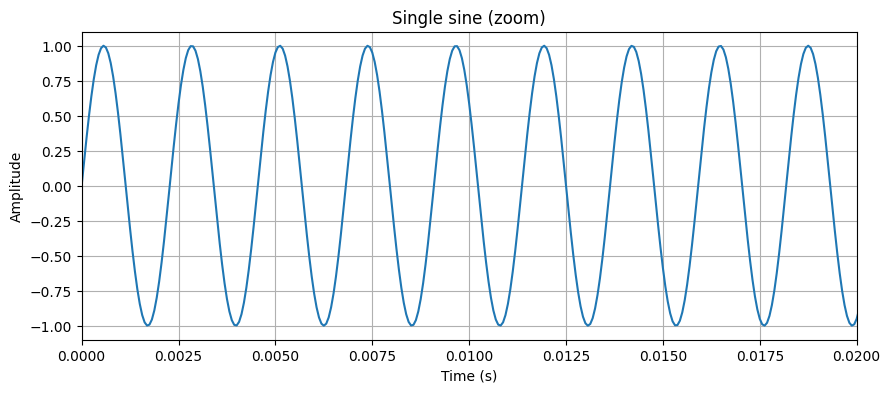

Peak frequency: 440.00 Hz


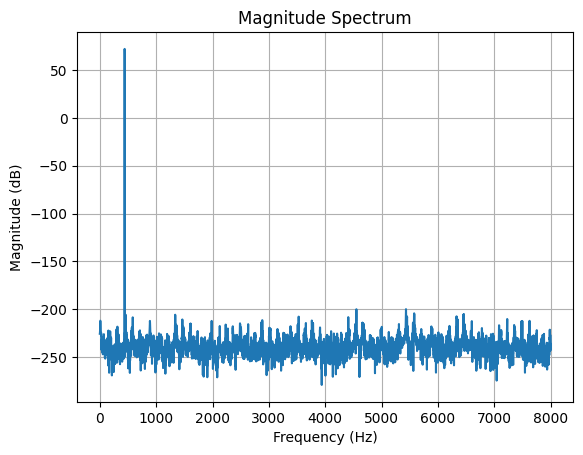

In [121]:
# TODO: Plot waveform (zoom) and spectrum
plot_waveform(x_sine, fs_syn, "Single sine (zoom)", tlim=(0, 0.02))
f, mag = magnitude_spectrum(x_sine, fs_syn, window_type="hann")

peak_index = np.argmax(mag)
peak_freq = f[peak_index]
print(f"Peak frequency: {peak_freq:.2f} Hz")

plt.figure()
plt.plot(f, 20 * np.log10(mag))
plt.title(f"Magnitude Spectrum")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude (dB)")

plt.grid(True)
plt.show()


### Questions (Single sine)

1. Where is the peak in the spectrum? Is it exactly at your chosen frequency? Why might it differ slightly?  
2. What happens to the spectrum if you shorten the signal duration to 0.1 seconds? (Try and explain.)


**Student Answer:**
1. The peak for the spectrum is at 440 hz which is the chosen frequency. It does not differ much. 
2. To me it looks the same. The patterns are still the same and the peak is at the same place.  

## 1.2 Sum of multiple sines

### Task
Create a signal that is the sum of 3–5 sine waves at different frequencies.
- Plot waveform (zoom)
- Plot spectrum
- Create a small table: frequency → amplitude used → observed peaks


In [122]:
# TODO: Sum of sines
freqs = [200, 400, 800, 1600]  # example
amps  = [1.0, 0.6, 0.4, 0.2]   # example
x_sum = np.zeros_like(t)
for f0, a in zip(freqs, amps):
    x_sum += a*np.sin(2*np.pi*f0*t)


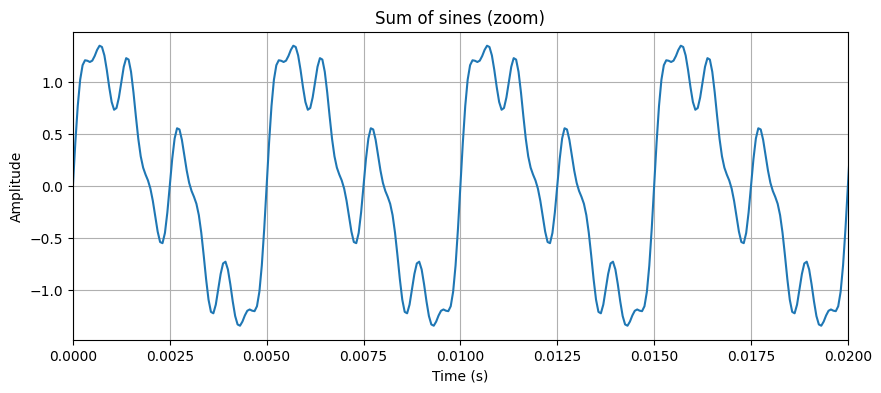

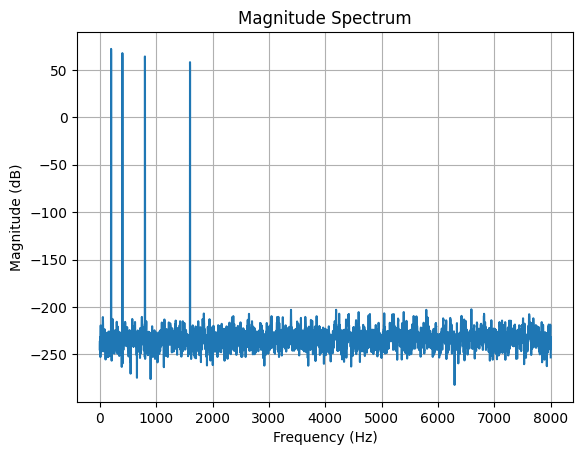

Summary Table:
| Frequency (Hz) | Amplitude | Observed Peak Frequency (Hz) |
| 200 | 1.0 |200.00 |
| 400 | 0.6 |400.00 |
| 800 | 0.4 |201.00 |
| 1600 | 0.2 |199.00 |


In [123]:
# TODO: Plot waveform and spectrum; create your small summary table in markdown
plot_waveform(x_sum, fs_syn, "Sum of sines (zoom)", tlim=(0, 0.02))
f, mag = magnitude_spectrum(x_sum, fs_syn, window_type="hann")
plt.figure()
plt.plot(f, 20 * np.log10(mag))
plt.title(f"Magnitude Spectrum")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude (dB)")
plt.grid(True)
plt.show()

peak_index = np.argsort(mag)[-5:][::-1]
peak_freqs = f[peak_index]

print("Summary Table:")
print("| Frequency (Hz) | Amplitude | Observed Peak Frequency (Hz) |")
for f0, a, pf in zip(freqs, amps, peak_freqs):
    print(f"| {f0} | {a} |{pf:.2f} |")

### Questions (Sum of sines)

1. Does the time-domain waveform look “simple” or “complex”?  
2. Why does the frequency-domain view make the signal easier to describe?  
3. If two sine waves are very close in frequency, when do they become hard to separate in FFT? (Connect to resolution.)


** Student Answer: ** 
1. The time domain waveform looks complex. It looks messy and I would not be able to tell that there are 5 different sin waves superpositioned. 
2. The frequency domain view makes it easier to describe because it only highlight the frequency at which it is at. So i can see the 4 different frequencies that we initially put in the 200, 400, 800, and 1600 hz frequency. It is definitely distinguishable. 
3. I think it becomed very difficult to seperate in FFT when the distance between each signal is less than the frequency resolution. This is because if the frequencies are far enough then they begin to combine into one and become indistiguishable. 

---

# 2. DFT/FFT Details: Resolution, Leakage, and Windows

### Key concepts you will explore
- **Frequency resolution** depends on signal length (N) and fs: Δf = fs / N
- **Spectral leakage** occurs when frequencies do not align with FFT bins
- **Windowing** reduces leakage but changes main-lobe width and amplitude

In this section you will run controlled experiments to see these effects.


## 2.1 Resolution experiment

### Task
Generate two sine waves close in frequency (e.g., 1000 Hz and 1050 Hz).
Compute spectra for:
- N = 0.02 sec, 0.05 sec, 0.1 sec (choose 3 lengths)

Describe when the two peaks become separable.


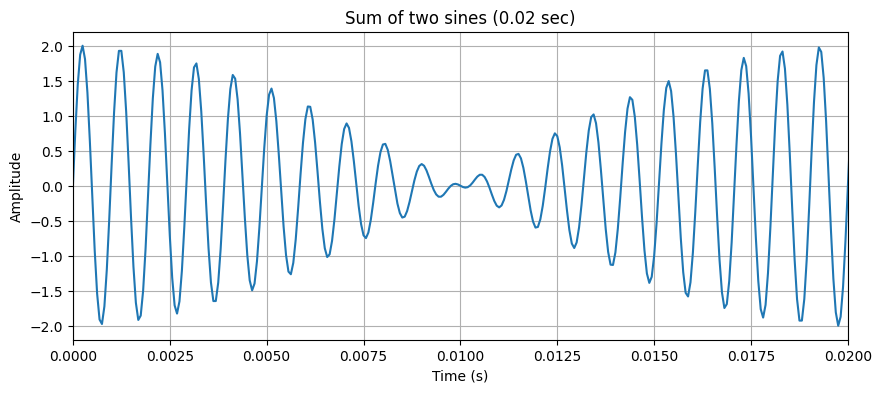

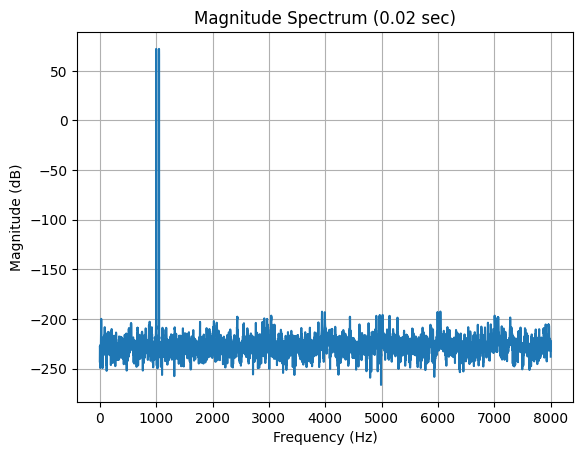

Delta f: 16000 / 0.02 = 800000.00 Hz


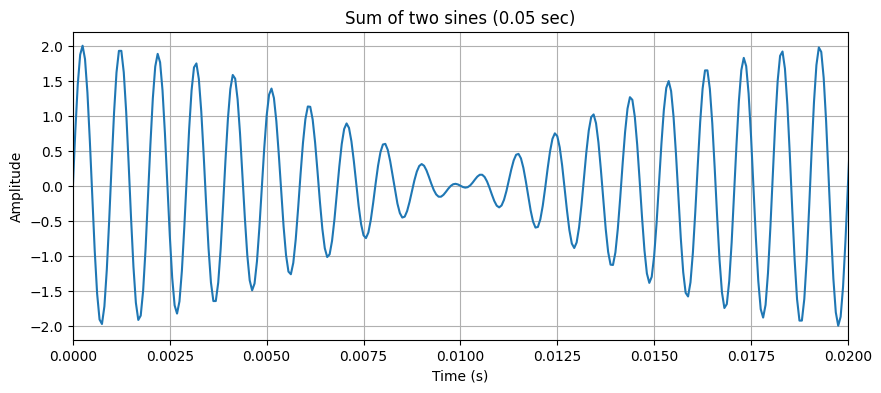

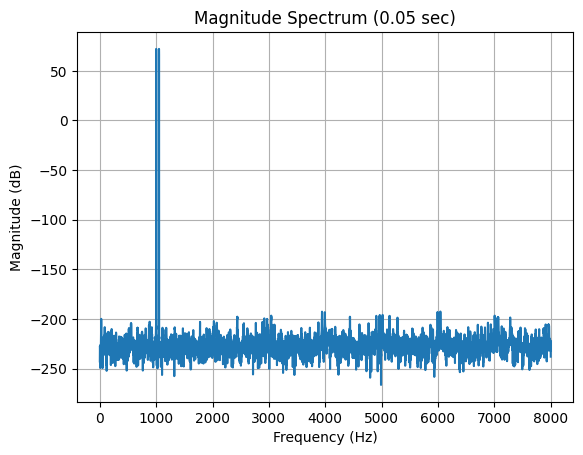

Delta f: 16000 / 0.05 = 320000.00 Hz


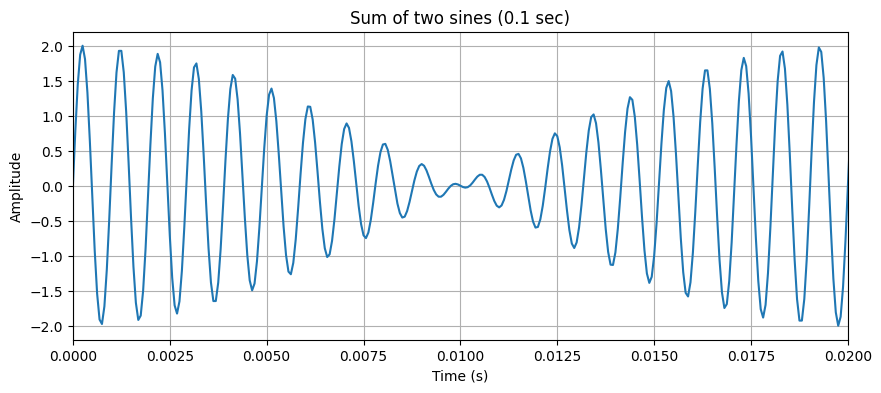

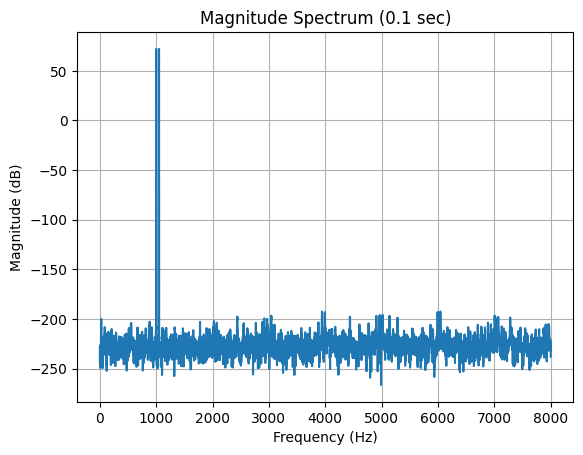

Delta f: 16000 / 0.1 = 160000.00 Hz


In [124]:
# TODO: Resolution experiment
f1, f2 = 1000, 1050
lengths_sec = [0.02, 0.05, 0.1]
#For each length:
#   generate x_len
#   compute spectrum
#   plot and compare
for length in lengths_sec:
    x_len = np.sin(2*np.pi*f1*t) + np.sin(2*np.pi*f2*t)
    plot_waveform(x_len, fs_syn, f"Sum of two sines ({length} sec)", tlim=(0, 0.02))
    f, mag = magnitude_spectrum(x_len, fs_syn, window_type="hann")
    plt.figure()
    plt.plot(f, 20 * np.log10(mag))
    plt.title(f"Magnitude Spectrum ({length} sec)")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Magnitude (dB)")
    plt.grid(True)
    plt.show()
    print(f"Delta f: {fs_syn} / {length} = {fs_syn/length:.2f} Hz")

### Questions (Resolution)

- For each length, compute Δf = fs / N and report it.
- Which length gives the clearest separation? Why?


**Student Answer** 

.1 gives the clearest distinction between the frequencies. This is because the frequency resolution is much smaller than the gap. resolution is 10 hz and the gap is 50 hz.


## 2.2 Leakage experiment (bin misalignment)

### Task
Pick a sine frequency that is **not** an integer multiple of Δf (e.g., 997 Hz).
Compute FFT:
- with rectangular window (no window)
- with Hann window

Compare leakage patterns.


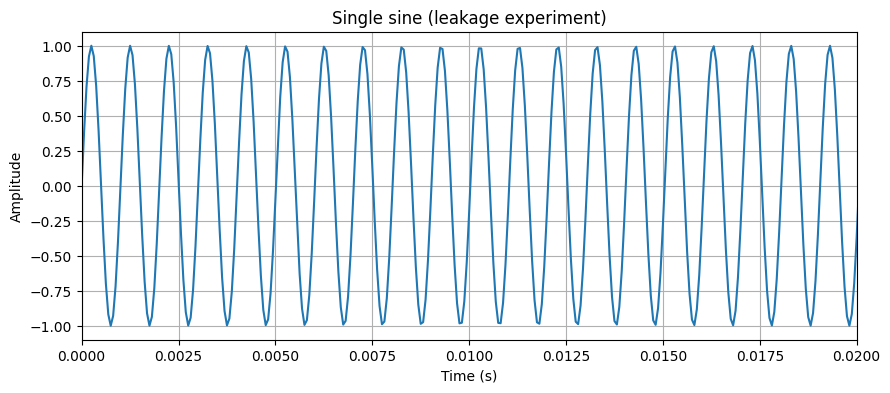

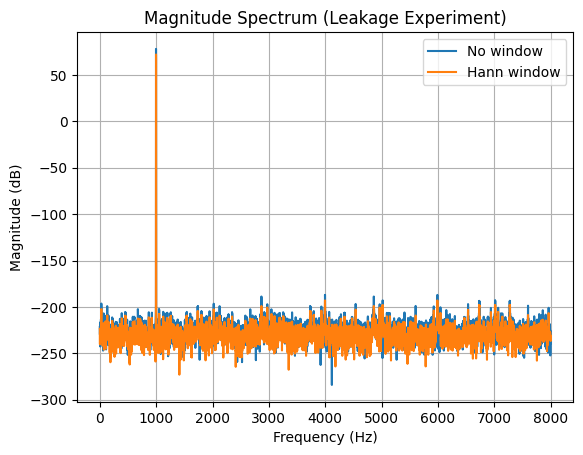

In [125]:
# TODO: Leakage experiment
f0 = 997
x = np.sin(2*np.pi*f0*t)
# Compute spectra with window=None vs window="hann"
f_none, mag_none = magnitude_spectrum(x, fs_syn, window_type=None)
f_hann, mag_hann = magnitude_spectrum(x, fs_syn, window_type="hann")


# Plot and compare
plot_waveform(x, fs_syn, "Single sine (leakage experiment)", tlim=(0, 0.02))
plt.figure()
plt.plot(f_none, 20 * np.log10(mag_none), label="No window")
plt.plot(f_hann, 20 * np.log10(mag_hann), label="Hann window")
plt.title("Magnitude Spectrum (Leakage Experiment)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude (dB)")


plt.legend()
plt.grid(True)
plt.show()


### Questions (Leakage & windows)

1. What changes when you apply a Hann window?  
2. What tradeoff do you observe (leakage vs main-lobe width / peak sharpness)?  
3. Why is windowing important for short-time speech spectra?


** Student Answer: ** 

1. 

When you apply a Hann window we see the magnitude decrease compared to the no window magnitude spectrum.

2. 

The hann leakage peak is wider than the no window which is very slim.

3. 

Windowing is important for short time speech spectra because sounds like consonants and vowels are quick and change often. They need to be observed with the correct window. 





---

# 3. Speech Spectrum: Harmonics vs Spectral Envelope

Speech contains:
- **Harmonics** (from voiced excitation) → equally spaced by fundamental frequency
- **Spectral envelope** (from vocal-tract filtering / formants)

In this section, you will select a short speech segment and compute its spectrum.


## 3.1 Select a voiced segment

### Task
Pick a 30–50 ms segment from your speech that is clearly voiced (e.g., a vowel region).
- Provide start and end times (seconds)
- Plot waveform zoom
- Play the segment


In [126]:
# TODO: Choose voiced segment times (in seconds)
t_start = 0.5
t_end = t_start + .04

# Extract:
n0 = int(t_start*fs)
n1 = int(t_end*fs)
x_seg = x[n0:n1]


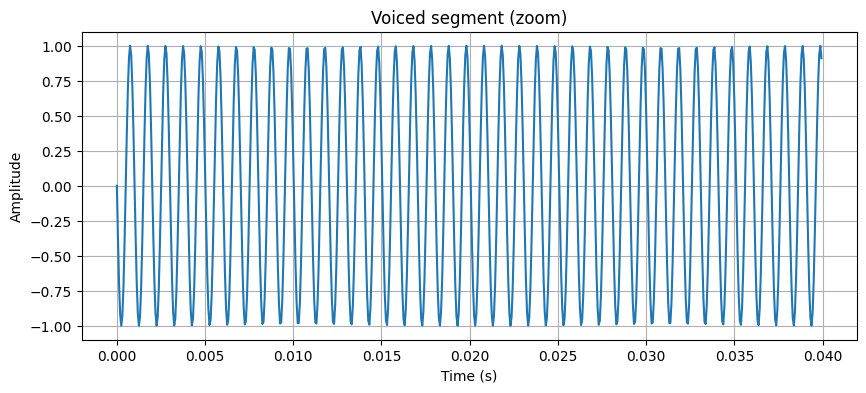

In [127]:
# TODO: Plot and play segment
plot_waveform(x_seg, fs, "Voiced segment (zoom)")
display(Audio(x_seg, rate=fs))




## 3.2 Spectrum of voiced segment

### Task
Compute and plot the magnitude spectrum of the segment:
- rectangular window
- Hann window

Use the same FFT size for fair comparison.

Then answer questions about:
- harmonic spacing
- envelope shape


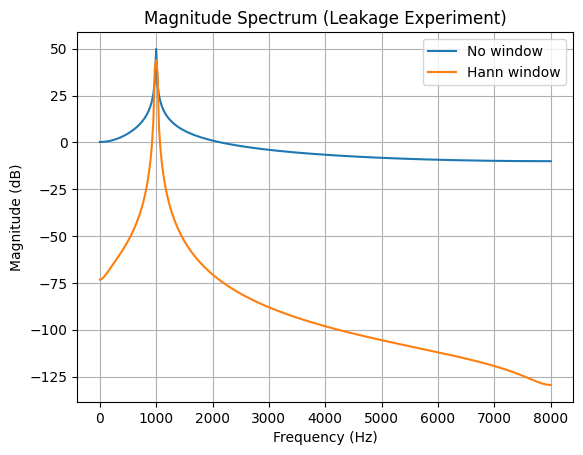

In [128]:
# TODO: Spectrum for voiced segment
f_rect, mag_rect = magnitude_spectrum(x_seg, fs, window_type=None)
f_hann, mag_hann = magnitude_spectrum(x_seg, fs, window_type="hann")


# Plot both (separately or overlay)
plt.figure()
plt.plot(f_rect, 20 * np.log10(mag_rect), label="No window")
plt.plot(f_hann, 20 * np.log10(mag_hann), label="Hann window")
plt.title("Magnitude Spectrum (Leakage Experiment)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude (dB)")


plt.legend()
plt.grid(True)
plt.show()


### Questions (Voiced speech spectrum)

1. Do you see harmonic peaks? Estimate the spacing (≈ F0). What is your estimated F0?  
2. Describe the spectral envelope: where are the broad peaks (formant-like regions)?  
3. How does windowing change the appearance of the harmonics and envelope?


** Student Answer: ** 

1. 

The spacing seems to be around at aroundf 1000hz at 10 db.

2. 

The spectral envelope is is the outline of the sound so basically the big curve. 

3. 

Windowing changes the apperances of the harmonics and envelope by making sure the leakage is minimal and we can take a look at the actual sound and not noise.

## 3.3 Unvoiced / fricative segment (optional but recommended)

### Task
Pick a 30–50 ms segment that is unvoiced (e.g., /s/ or /f/ region, if present).
Compute spectrum and compare to voiced.

Answer: how does the spectrum differ?


In [ ]:
# TODO: Choose unvoiced segment times and repeat the spectrum analysis
# t_start_u = ...
# t_end_u = ...
# x_seg_u = ...


### Questions (Unvoiced vs voiced)

- What is different about the spectrum of unvoiced speech?
- Do you still see harmonic structure? Why or why not?
- Where is most of the energy concentrated (low vs high frequencies)?


---

# 4. Short-Time Fourier Transform View (Spectrogram) - Optional

### Task
Plot a spectrogram of your full utterance with reasonable parameters:
- window length: ~25 ms
- hop: ~10 ms
- display in dB

Then answer conceptual questions.


In [ ]:
# TODO: Spectrogram helper (STFT)
def plot_spectrogram(x, fs, title, n_fft=1024, win_ms=25, hop_ms=10):
    raise NotImplementedError


In [ ]:
# TODO: Plot spectrogram
# plot_spectrogram(x, fs, "Spectrogram of utterance")


### Questions (Spectrogram intuition)

1. Where do you see voiced regions vs unvoiced regions in the spectrogram?  
2. How does the spectrogram reveal formants (broad bands)?  
3. If you increase window length to 50 ms, what changes? (Try and explain.)  
4. If you decrease hop size, what changes? (Try and explain.)


---

# 5. Summary: What Fourier View Gives You

Write 8–12 lines:

- What information is easiest to see in time domain?
- What information is easiest to see in frequency domain?
- For speech, why do we often use a short-time (frame-based) spectrum instead of one FFT on the whole signal?


**Student Answer:** 
The information that is easiest to see in the time domain is the frequency. This is because it is a spike in the spectrum. So it is more noticeable.  In the frequency domain it is much easier to look at signals and see their composition and also the heights and the lows of the sound.  We use short time (frame-based) sprectrum because it allows us to look at smaller windows of sound which are important for analyzing speech since speech is a bunch of small sounds combining to make one great sound. If you did FFT on the whole signal we would not have a great understanding of the sound and lose details. 


---

# 6. Reflection (Mandatory)

Write thoughtful answers (be specific):

1. What did you learn about FFT/DFT that you did not expect?  
2. What was one surprising result about windows or leakage?  
3. Which plot helped you the most (waveform, spectrum, spectrogram) and why?  
4. If you had to explain “frequency resolution” in two sentences, what would you say?  
5. What is one question you now want to explore further (e.g., formant tracking, pitch estimation)?


1. I learned that frequencies are easier to observe in the frequency domain. It was also interesting to me to see how windows are important as they can prevent leakage. 
2.  I was suprised how windows really do make a difference when it comes to analyzing the sounds. Hann and no window made a drastic difference when it came to leakage. 
3.  I think the spectrum graph helped me the most since it was about frequencies and showed me how waveforms can look messy but with the spectrum graph you can analyze specific frequencies in he waveform.
4.  Frequency resolution is important because it helps define the difference between two or more sounds that are close in frequencies. You want a large observation to be able to distinguish the two sounds from each other. 
5. I would like to explore format tracking

---

# 7. AI Use Disclosure (Required)

If you used any AI tools (including ChatGPT), briefly describe:
- What you used it for (e.g., debugging, concept clarification)
- What you wrote/changed yourself

*(If you did not use AI, write “No AI tools used.”)*


**Student Answer:**
I used it to help me understand topics while doing homework. Show me example code and architectural approaches.
